# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bike - sharing - dataset
- **Email:** giyansaputra883@gmail.com
- **ID Dicoding:** muhammad_giyan_saputra

## Menentukan Pertanyaan Bisnis

- Bagaimana total penyewaan sepeda berbeda antara masing-masing hari dalam seminggu, dan hari mana yang memiliki jumlah penyewaan tertinggi berdasarkan data penyewaan? Apakah jumlah penyewaan sepeda pada akhir pekan lebih tinggi atau lebih rendah dibandingkan dengan hari kerja, berdasarkan data penyewaan harian?
- Pada jam berapa penyewaan sepeda mencapai puncaknya berdasarkan rata-rata jumlah penyewaan setiap jam, dan apakah terdapat pola tertentu yang menonjol di antara jam-jam tersebut?

## Import Semua Packages/Library yang Digunakan

Pada proyek ini, saya menggunakan beberapa library Python yang umum digunakan untuk analisis data dan visualisasi.

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

Pada tahap ini, saya akan memuat dan menampilkan beberapa baris pertama dari dataset `hour.csv` dan `day.csv`, yang berisi informasi mengenai permintaan penyewaan sepeda.

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour = pd.read_csv ("hour.csv")
csv_file_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_day = pd.read_csv ("day.csv")
csv_file_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari data harian, dapat dianalisis apakah terdapat peningkatan atau penurunan jumlah penyewaan sepeda pada hari-hari tertentu. Misalnya, hari libur atau akhir pekan cenderung memiliki jumlah penyewaan yang lebih sedikit dibandingkan hari kerja.
- Data per jam memungkinkan mengidentifikasi pola penyewaan harian. Misalnya, penyewaan sepeda mungkin lebih tinggi selama jam sibuk (pagi dan sore hari) ketika orang berangkat dan pulang kerja, serta lebih rendah pada tengah malam.

### Assessing Data

Setelah data berhasil dimuat, langkah berikutnya adalah menilai kualitas dan integritas dataset dengan cara memeriksa struktur data serta mengidentifikasi nilai-nilai yang hilang (missing values).

Pada tahap ini, saya melakukan beberapa langkah berikut pada dataset `hour.csv` dan `day.csv`:

- Menampilkan beberapa baris pertama dari dataset untuk mendapatkan gambaran awal mengenai struktur dan tipe data.
    csv_file_hour.head()
- Memeriksa informasi keseluruhan dari dataset, termasuk jumlah baris dan kolom, tipe data, serta apakah ada kolom yang mengandung nilai kosong (null).
    csv_file_hour.info()
- Menghitung jumlah nilai yang hilang di setiap kolom.
    csv_file_hour.isna().sum()

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour = pd.read_csv ("hour.csv")
csv_file_hour.head()

csv_file_hour.info()
csv_file_hour.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_day = pd.read_csv ("day.csv")
csv_file_day.head()

csv_file_day.info()
csv_file_day.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Data harian menunjukkan bahwa tidak ada nilai yang hilang dalam kolom-kolom penting, yang memastikan analisis yang akurat terkait faktor-faktor yang mempengaruhi jumlah penyewaan sepeda per hari.
- Data penyewaan per jam mengindikasikan adanya variasi yang signifikan dalam jumlah penyewaan, dengan informasi mengenai jam sibuk dan tidak sibuk yang dapat digunakan untuk perencanaan dan pengelolaan sepeda

### Cleaning Data

Pada tahap ini, saya membersihkan data dari nilai-nilai yang berpotensi mengganggu proses analisis, seperti data duplikat. Untuk memastikan data yang digunakan adalah data unik, saya melakukan penghapusan duplikasi pada dataset.

- Menghapus baris-baris duplikat dalam dataset `hour.csv` dan `day.csv` untuk memastikan tidak ada data yang berulang.

In [371]:
csv_file_hour.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", csv_file_hour.duplicated().sum())

Jumlah duplikasi:  0


In [372]:
csv_file_day.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", csv_file_day.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Proses penghapusan duplikasi pada data penyewaan sepeda per jam berhasil mengeliminasi semua data duplikat, sehingga memastikan bahwa analisis yang dilakukan menggunakan data yang unik dan representatif.
- Setelah penghapusan duplikasi, data harian menunjukkan statistik deskriptif yang baik, memungkinkan pemahaman yang lebih mendalam tentang penyewaan sepeda dan faktor-faktor yang mempengaruhi jumlah penyewaan setiap harinya.

## Exploratory Data Analysis (EDA)

Saya melakukan analisis eksplorasi terhadap data penyewaan sepeda. Tujuan dari analisis ini adalah untuk memahami pola penyewaan sepeda berdasarkan waktu dalam seminggu.

- Saya menganalisis rata-rata penyewaan sepeda berdasarkan jam dalam sehari.

- Saya melihat total penyewaan sepeda berdasarkan sehari dalam seminggu. Hal ini akan membantu saya memahami pola penyewaan sepeda dan menentukan hari-hari yang paling banyak digunakan untuk penyewaan.

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
csv_file_hour = pd.read_csv("hour.csv")
csv_file_day = pd.read_csv("day.csv")

In [375]:
csv_file_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [376]:
csv_file_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [377]:
csv_file_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [378]:
csv_file_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

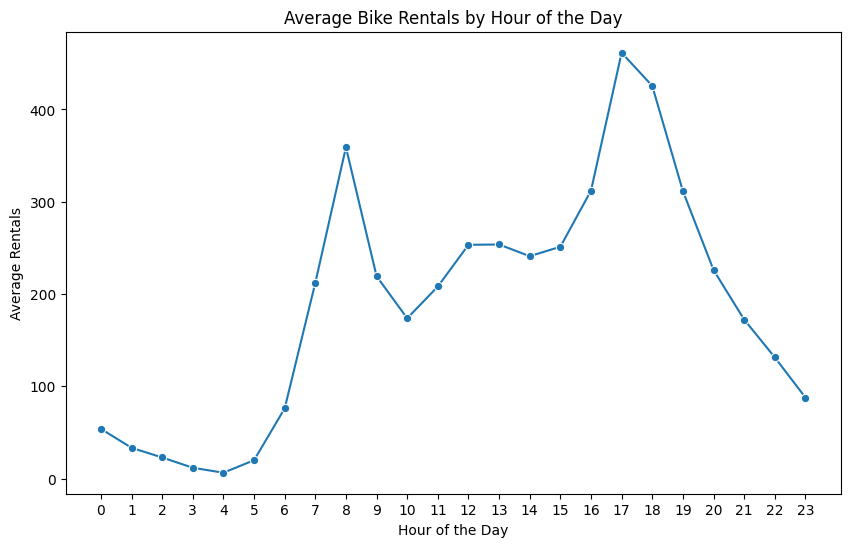

In [379]:
hourly_rentals = csv_file_hour.groupby('hr').agg({'cnt': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.show()


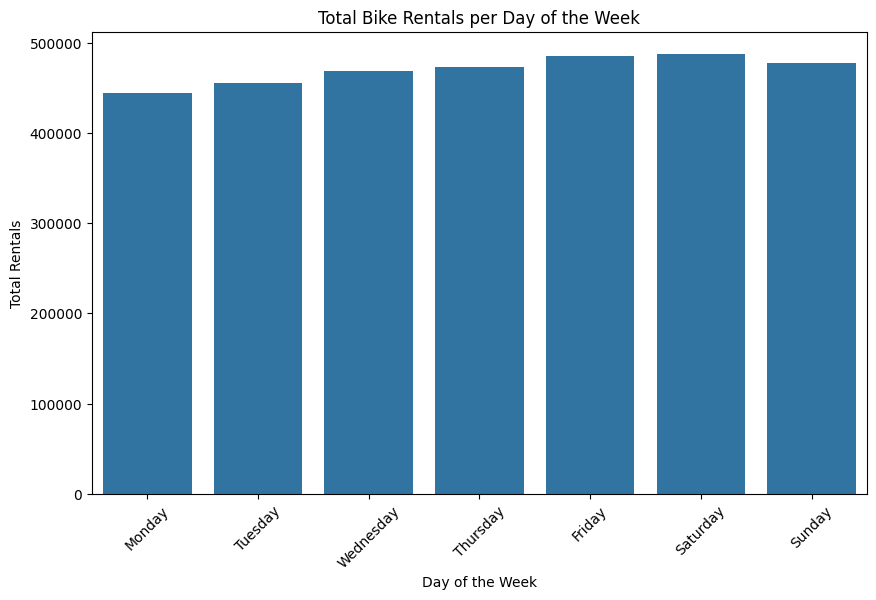

In [380]:
daily_rentals = csv_file_day.groupby('weekday').agg({'cnt': 'sum'}).reset_index()
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_rentals['weekday'] = daily_rentals['weekday'].map(day_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_rentals, x='weekday', y='cnt', color='#1f77b4', dodge=False)
plt.title('Total Bike Rentals per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.legend([], frameon=False) 
plt.show()

**Insight:**
- Data memiliki variasi yang signifikan dalam jumlah penyewaan sepeda per jam, dengan beberapa jam tertentu seperti jam sibuk di pagi dan sore memiliki tingkat penyewaan yang jauh lebih tinggi dibandingkan jam lainnya.
- Statistik deskriptif dari data harian menunjukkan bahwa faktor-faktor seperti hari kerja dan akhir pekan secara jelas mempengaruhi jumlah penyewaan sepeda, dengan peningkatan yang terlihat pada hari kerja, yang menandakan bahwa sepeda lebih banyak digunakan sebagai alat transportasi sehari-hari oleh pekerja atau individu yang melakukan aktivitas rutin.

## Visualization & Explanatory Analysis

Pada tahap ini, saya membuat beberapa visualisasi untuk lebih memahami pola penyewaan sepeda berdasarkan dataset `hour.csv` dan `day.csv`. Visualisasi membantu mengidentifikasi tren dan hubungan dalam data yang dapat digunakan untuk menjawab pertanyaan bisnis terkait permintaan sepeda.

Saya menggunakan grafik bar (bar plot) untuk menunjukkan total penyewaan sepeda berdasarkan hari dalam seminggu, dengan menggunakan kolom `cnt`.

### Pertanyaan 1: Bagaimana total penyewaan sepeda berbeda antara masing-masing hari dalam seminggu, dan hari mana yang memiliki jumlah penyewaan tertinggi berdasarkan data penyewaan? Apakah jumlah penyewaan sepeda pada akhir pekan lebih tinggi atau lebih rendah dibandingkan dengan hari kerja, berdasarkan data penyewaan harian?

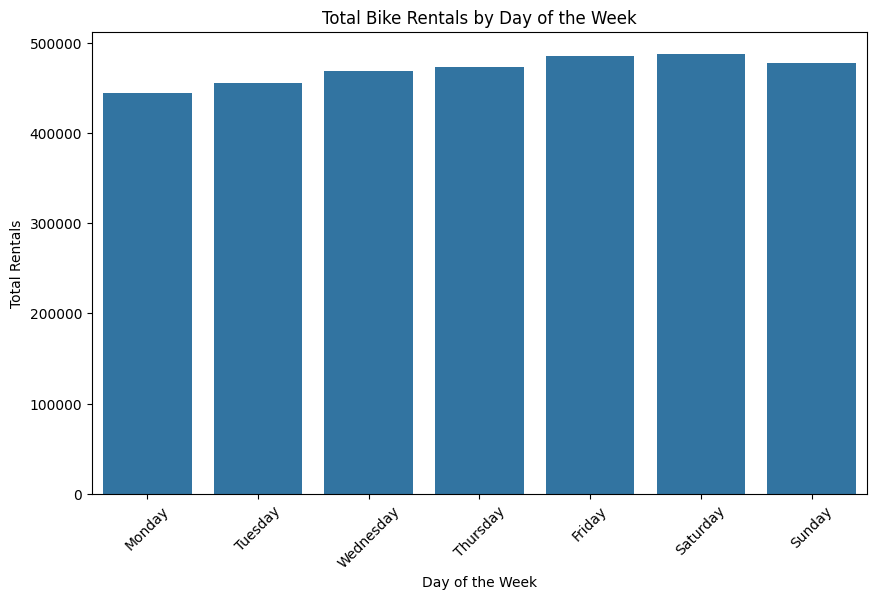

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_day = pd.read_csv("day.csv")

csv_file_day['weekday_name'] = csv_file_day['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

total_rentals = csv_file_day.groupby('weekday_name')['cnt'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=total_rentals, x='weekday_name', y='cnt', color='#1f77b4')
plt.title('Total Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.show()


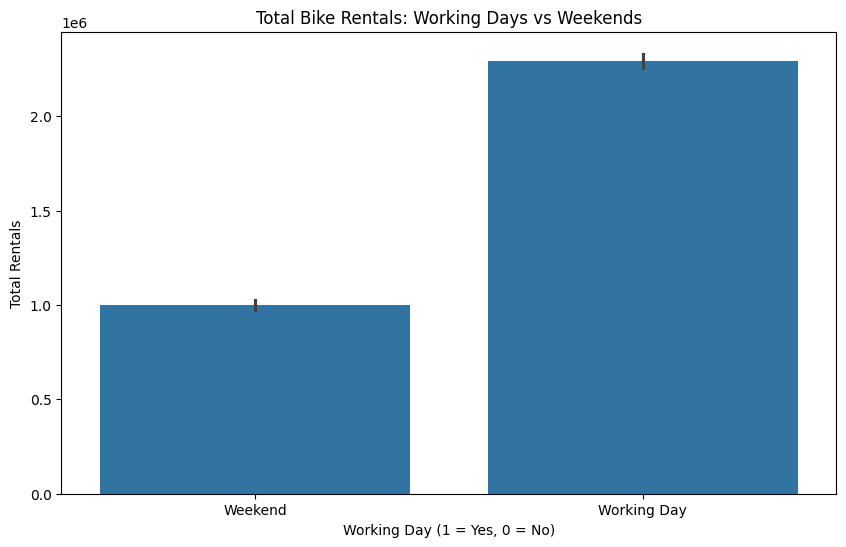

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour = pd.read_csv("hour.csv")

plt.figure(figsize=(10, 6))
sns.barplot(data=csv_file_hour, x='workingday', y='cnt', estimator=sum, color='#1f77b4', dodge=False)
plt.title('Total Bike Rentals: Working Days vs Weekends')
plt.xlabel('Working Day (1 = Yes, 0 = No)')
plt.ylabel('Total Rentals')
plt.xticks([0, 1], ['Weekend', 'Working Day'])
plt.show()

### Pertanyaan 2: Pada jam berapa penyewaan sepeda mencapai puncaknya berdasarkan rata-rata jumlah penyewaan setiap jam, dan apakah terdapat pola tertentu yang menonjol di antara jam-jam tersebut?

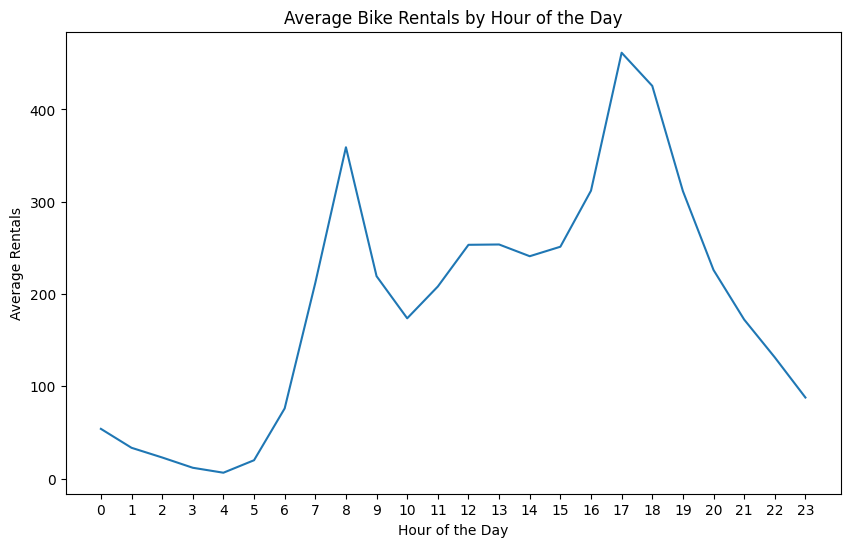

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(data=csv_file_hour, x='hr', y='cnt', estimator='mean', errorbar=None)
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.show()


**Insight:**
- Dari analisis total penyewaan sepeda per hari, terlihat bahwa penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini menandakan bahwa sepeda berfungsi sebagai alat transportasi utama bagi banyak pengguna dalam menjalankan aktivitas sehari-hari.

- Grafik garis memperlihatkan pola penyewaan sepeda yang jelas berdasarkan waktu, dengan lonjakan penyewaan terjadi selama jam sibuk pagi dan sore, menandakan bahwa pengguna lebih cenderung menggunakan sepeda untuk perjalanan kerja atau aktivitas yang terkait dengan mobilitas harian.

## Analisis Lanjutan (Opsional)

Pada tahap ini, saya melakukan Analisis lanjutan pada dataset penyewaan sepeda, tanpa menggunakan algoritma machine learning untuk menganalisis perilaku pengguna berdasarkan tiga dimensi utama: Recency (R), Frequency (F), dan Monetary (M). Analisis ini digunakan untuk memahami pola penyewaan sepeda yang dapat digunakan dalam pengambilan keputusan, seperti kapan hari puncak penyewaan terjadi atau bagaimana frekuensi penyewaan berubah dalam periode tertentu.

- Recency (R): Mengukur seberapa baru penyewaan sepeda dilakukan dari tanggal terakhir penyewaan dalam dataset.
- Frequency (F): Menghitung seberapa sering penyewaan sepeda dilakukan dalam periode waktu tertentu.
- Monetary (M): Mengukur total jumlah penyewaan sepeda (dalam hal ini, jumlah sepeda yang disewa atau kolom `cnt`) sebagai pengganti nilai moneter.


In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour['dteday'] = pd.to_datetime(csv_file_hour['dteday'])
max_date = csv_file_hour['dteday'].max()
csv_file_hour['recency'] = (max_date - csv_file_hour['dteday']).dt.days

frequency = csv_file_hour.groupby('dteday').size().reset_index(name='frequency')

monetary = csv_file_hour.groupby('dteday')['cnt'].sum().reset_index(name='monetary')

rfm = csv_file_hour.groupby('dteday').agg({
    'recency': 'min',
    'cnt': 'sum'
}).reset_index()

rfm = pd.merge(rfm, frequency, on='dteday')
rfm = pd.merge(rfm, monetary, on='dteday')

rfm.head()

,dteday,recency,cnt,frequency,monetary
0,2011-01-01,730,985,24,985
1,2011-01-02,729,801,23,801
2,2011-01-03,728,1349,22,1349
3,2011-01-04,727,1562,23,1562
4,2011-01-05,726,1600,23,1600


## Conclusion

- Berdasarkan analisis data, terlihat bahwa penyewaan sepeda mengalami peningkatan yang signifikan pada hari kerja dibandingkan dengan akhir pekan, dengan puncak penyewaan terjadi pada jam-jam tertentu, terutama di pagi dan sore hari. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai sarana transportasi untuk kegiatan sehari-hari, seperti pergi bekerja atau beraktivitas di luar rumah.

-   Analisis ini memberikan wawasan penting bagi penyedia layanan penyewaan sepeda untuk meningkatkan penawaran dan promosi. Dengan memahami pola penggunaan yang menunjukkan tingginya permintaan pada hari kerja, penyedia dapat menyesuaikan strategi bisnis mereka, seperti menawarkan diskon khusus untuk pengguna yang menyewa pada hari kerja, serta meningkatkan ketersediaan sepeda pada jam sibuk.